# Import the Dataset

In [72]:
# import the data

import pandas as pd

crime = pd.read_csv('recorded_crime_ireland.csv')
crime.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1
1,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0
2,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0
3,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0
4,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1


# Overview of the data

In [73]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157052 entries, 0 to 157051
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  157052 non-null  object
 1   Quarter          157052 non-null  object
 2   Garda Division   157052 non-null  object
 3   Type of Offence  157052 non-null  object
 4   UNIT             157052 non-null  object
 5   VALUE            157052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.2+ MB


In [74]:
crime.describe()

,VALUE
count,157052.000000
mean,59.076675
std,150.331762
min,0.000000
25%,0.000000
50%,4.000000
75%,46.000000
max,2563.000000


# Preprocessing 

In [75]:
# create new column 'Year'

crime['Year'] = crime['Quarter'].str[:4]
crime.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE,Year
0,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1,2003
1,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0,2003
2,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0,2003
3,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0,2003
4,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1,2003


In [76]:
# create new column 'Q'

crime['Q'] = crime['Quarter'].str[4:]
crime = crime[['Quarter','Garda Division', 'Type of Offence', 'VALUE', 'Year', 'Q']]
crime.head()

,Quarter,Garda Division,Type of Offence,VALUE,Year,Q
0,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,1,2003,Q1
1,2003Q1,Cavan/Monaghan Garda Division,Murder,0,2003,Q1
2,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,0,2003,Q1
3,2003Q1,Cavan/Monaghan Garda Division,Infanticide,0,2003,Q1
4,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,1,2003,Q1


In [77]:
# check the dataframe

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157052 entries, 0 to 157051
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Quarter          157052 non-null  object
 1   Garda Division   157052 non-null  object
 2   Type of Offence  157052 non-null  object
 3   VALUE            157052 non-null  int64 
 4   Year             157052 non-null  object
 5   Q                157052 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.2+ MB


# Exploratory Data Analysis


In [78]:
# print out an overview of the data with KPIs for total crime count, start date and end date

start_date = min(crime['Year'])
end_date = max(crime['Year'])
total_crimes = sum(crime['VALUE'])

print("There was a total of " + str(total_crimes) + " recorded crime offences between " + str(start_date) + " and " + str(end_date) + ".")

There was a total of 9278110 recorded crime offences between 2003 and 2022.


In [79]:
# calculate number of offences per year

total = pd.pivot_table(crime, values='VALUE', index=['Year'], aggfunc="sum")
total.head()

,VALUE
Year,
2003,456739
2004,464692
2005,505475
2006,534868
2007,563948


In [80]:
# Visualise 'Number of Offences by Year'

import plotly.express as px

fig = px.bar(  
    data_frame=total,    
    x=total.index,   y='VALUE', text_auto='.2s', labels={'VALUE': 'Total Offences'},
    title='Number of Offences 2003-2022')

"""Change angle of text on bars
https://plotly.com/python/bar-charts/
"""
fig.update_traces(textfont_size=10, textangle=0)

fig.show()

In [81]:
# calculate number of offences per quarter

"""Course: Data Manipulation with Pandas
Lesson: Pivot Tables
https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=13"""

quarters = pd.pivot_table(crime, values='VALUE', index=['Quarter'], aggfunc="sum")
quarters.head()

,VALUE
Quarter,
2003Q1,112168
2003Q2,114033
2003Q3,116684
2003Q4,113854
2004Q1,117415


In [82]:
# Calculate crime count by quarter

crimes_by_q = crime.groupby('Q')['VALUE'].sum()
crimes_by_q

Q
Q1    2288969
Q2    2339546
Q3    2401586
Q4    2248009
Name: VALUE, dtype: int64

In [83]:
# Visualise crime count by quarter

crimes_by_q_m = round(crimes_by_q/1000000, 2)

fig = px.bar(crimes_by_q_m, title='Total Crimes by Quarter', text_auto=True,
       labels={'value': 'Total Offences (M)'}, 
       hover_data={'value':True, 'variable':False})

fig.update_layout(xaxis_title=None, showlegend=False)

In [84]:
# Calculate crime count by 'Type of Offence'

offences = pd.pivot_table(crime, values='VALUE', index=['Type of Offence'], aggfunc="sum")
offences.head()

,VALUE
Type of Offence,
"Abandoning a child, child neglect and cruelty",6167
Abduction of person under 16 years of age,401
Aggravated burglary,5616
Arson,36075
"Assault causing harm, poisoning",78113


In [85]:
# Visualise crime count by 'Type of Offence'

fig = px.bar(  
    data_frame=offences,    
    x=offences.index,   y='VALUE', 
    title='Most Common Offences 2003-2022',
    width=990, height=1000, labels={'VALUE': 'Total Offences'},
 
    """Colour Scales
    https://plotly.com/python/colorscales/#:~:text=Color%20scale%20defaults%20depend%20on,in%20go.Scatter%20traces%20or"""

    color='VALUE', color_continuous_scale=px.colors.sequential.Viridis)

# [2] order the barchart

"""Order plotly express Bar chart:
https://statisticsglobe.com/order-bars-plotly-barchart-python"""

fig.update_layout(xaxis = {"categoryorder":"total descending"})
    
fig.show()

SyntaxError: positional argument follows keyword argument (1108493268.py, line 12)

In [86]:
# Calculate Top 20 'Type of Offence'

top20 = offences.sort_values(by='VALUE', ascending=False).head(20)
top20.head()

,VALUE
Type of Offence,
Theft and related offences,1399441
Public order and other social code offences,840858
"Other thefts, handling stolen property",736580
Disorderly conduct,702980
Damage to property and to the environment,615534


In [87]:
# Visualise Top 20 'Type of Offence'

fig = px.bar(  
    data_frame=top20,    
    x=top20.index,   y='VALUE', 
    title='Top 20 Offences 2003-2022',
    width=990, height=800, labels={'VALUE': 'Total Offences'},
    # [1] color scales
    color='VALUE', color_continuous_scale=px.colors.sequential.Viridis)

# [2] order the barchart
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [88]:
# Calculate Bottom 20 'Type of Offence'

bottom20 = offences.sort_values(by='VALUE', ascending=False).tail(20)
bottom20.head()

,VALUE
Type of Offence,
Perverting the course of justice,2287
Prostitution offences,2115
"Carjacking, hijacking/unlawful seizure of aircraft/vessel",2082
Homicide offences,1936
Blackmail or extortion,1765


In [89]:
# Visualise Bottom 20 'Type of Offence'

fig = px.bar(  
    data_frame=bottom20,    
    x=bottom20.index,   y='VALUE', 
    title='Bottom 20 Offences 2003-2022',
    width=990, height=800, labels={'VALUE': 'Total Offences'},
    # [1] color scales
    color='VALUE', color_continuous_scale=px.colors.sequential.Viridis)

# [2] order the barchart
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

In [90]:
# Calculate crime count by Garda division

locations = pd.pivot_table(crime, values='VALUE', index=['Garda Division'], aggfunc="sum")
locations.head()

,VALUE
Garda Division,
Cavan/Monaghan Garda Division,210556
Clare Garda Division,161455
Cork City Garda Division,547291
Cork North Garda Division,186817
Cork West Garda Division,126587


In [91]:
# Visualise crime count by Garda division

fig = px.bar(  
    data_frame=locations,    
    x=locations.index,   y='VALUE', 
    title='Offences by Garda Division',
    width=990, height=600, 
    labels={'VALUE': 'Total Offences'}, 
    color='VALUE', 
    color_continuous_scale=px.colors.sequential.Viridis)

# [1] order the barchart
fig.update_layout(xaxis = {"categoryorder":"total descending"})

    
fig.show()

# Insight 1

In [92]:
# Visualise crime counts over time, marking the highest and lowest points

fig = px.line(  
    data_frame=quarters,    
    x=quarters.index,   y='VALUE', labels={'VALUE': 'Total Offences'},
    title='Number of Offences 2003-2022')

"""Add & Annotate vertical lines
https://plotly.com/python/text-and-annotations/"""

fig.add_vline(x='2008Q2', line_dash="dash", line_color="red")
fig.add_vline(x='2021Q1', line_dash="dash", line_color="green")


fig.add_annotation(x='2009Q4', y='152000',
            text="Highest = Q2, 2008",
            showarrow=False)

fig.add_annotation(x='2019Q3', y='80000',
            text="Lowest = Q1, 2021",
            showarrow=False)

fig.show()

In [93]:
# Visualise crime counts over time, marking period of lockdown


fig = px.line(  
    data_frame=quarters,    
    x=quarters.index,   y='VALUE', labels={'VALUE': 'Total Offences'},
    title='Number of Offences 2003-2022')

"""Add shaded area
https://stackoverflow.com/questions/55062965/python-how-to-make-shaded-areas-or-alternating-background-color-using-plotly
"""

fig.add_vrect(x0="2020Q1", x1="2021Q2", 
              fillcolor="orange", opacity=0.4, line_width=0, 
              annotation_text="lockdown", annotation_position="top left",
              annotation_font_color="red")

fig.add_annotation(x='2018Q3', y='80000',
            text="3 lowest quarters",
            showarrow=False)


fig.show()

In [94]:
# Calculate the median crime count by during lockdown and outside lockdown

quarters = quarters.reset_index()

during_lockdown = quarters[quarters['Quarter'].isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'])]
outside_lockdown = quarters[~quarters['Quarter'].isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'])]

print('The median crime count for During Lockdown is ' + str(during_lockdown['VALUE'].median()))
print('The median crime count for Outside Lockdown is ' + str(outside_lockdown['VALUE'].median()))

The median crime count for During Lockdown is 86302.0
The median crime count for Outside Lockdown is 116342.0


# F-Test and T-Test

In [95]:
# Conduct an F-Test to check for equal variance

import numpy as np  
from scipy import stats  

x = during_lockdown['VALUE'].values
y = outside_lockdown['VALUE'].values

variance1 = np.var(x, ddof=1)
variance2 = np.var(y, ddof=1)

f_value = variance1 / variance2

degf1 = len(x) - 1
degf2 = len(y) - 1

p_value = stats.f.cdf(f_value, degf1, degf2)

print('Degree of freedom 1:',degf1)
print('Degree of freedom 2:',degf2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 4
Degree of freedom 2: 73
F-statistic: 0.30157172234576235
p-value: 0.12399427082709617


In [96]:
# Conduct a T-test for unequal variance

t_stat, p_val = stats.ttest_ind(x, y, equal_var=False)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -6.98666368486714
p-value = 0.0004352022801594368


# Insight 2

In [97]:
# Subset murder-related crimes

murder = crime[crime['Type of Offence'].isin(['Homicide offences', 'Murder', 'Infanticide', 'Murder-attempt', 'Manslaughter'])]
murder.head()

,Quarter,Garda Division,Type of Offence,VALUE,Year,Q
0,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,1,2003,Q1
1,2003Q1,Cavan/Monaghan Garda Division,Murder,0,2003,Q1
2,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,0,2003,Q1
3,2003Q1,Cavan/Monaghan Garda Division,Infanticide,0,2003,Q1
9,2003Q1,Cavan/Monaghan Garda Division,Murder-attempt,0,2003,Q1


In [98]:
# Create a pivot table for murder-related crimes

murder_pivot = pd.pivot_table(murder, values='VALUE', index=['Year', 'Quarter', 'Type of Offence'], aggfunc="sum")
murder_pivot=murder_pivot.reset_index()
murder_pivot.head()

,Year,Quarter,Type of Offence,VALUE
0,2003,2003Q1,Homicide offences,28
1,2003,2003Q1,Infanticide,0
2,2003,2003Q1,Manslaughter,7
3,2003,2003Q1,Murder,10
4,2003,2003Q1,Murder-attempt,2


In [99]:
# Subset the pivot table for lockdown and not_lockdown

lockdown = murder_pivot[murder_pivot['Quarter'].isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'])]
not_lockdown = murder_pivot[~murder_pivot['Quarter'].isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'])]

In [100]:
# Visualise murder-related crime counts for lockdown and not_lockdown

fig = px.box(lockdown, x="Type of Offence", y="VALUE", color="Type of Offence", title='During Lockdown', labels={'VALUE': 'Number of Offences'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_layout(yaxis_range=[0,50])
fig.show()

In [101]:
fig = px.box(not_lockdown, x="Type of Offence", y="VALUE", color="Type of Offence", title='Outside of Lockdown', labels={'VALUE': 'Number of Offences'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_layout(yaxis_range=[0,50])
fig.show()

In [102]:
# Create new column to subset data within same dataframe

def period(x):
    if x in('2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1'):
        return 'During Lockdown'
    else:
        return 'Outside Lockdown'
        
murder_pivot['Period'] = murder_pivot['Quarter'].apply(period)

In [103]:
# hide rows with 'Infanticide'

hide = murder_pivot['Type of Offence'] == 'Infanticide'

murder_pivot = murder_pivot[~hide]

murder_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 394
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             316 non-null    object
 1   Quarter          316 non-null    object
 2   Type of Offence  316 non-null    object
 3   VALUE            316 non-null    int64 
 4   Period           316 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.8+ KB


In [104]:
# Visualise murder related crime counts during and outside lockdown

fig = px.box(murder_pivot, x="Type of Offence", y="VALUE", color="Period", title='Murder Related Crimes', labels={'VALUE': 'Number of Offences'})
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.update_layout(yaxis_range=[0,50])
fig.show()

In [105]:
murder_pivot.head()

,Year,Quarter,Type of Offence,VALUE,Period
0,2003,2003Q1,Homicide offences,28,Outside Lockdown
2,2003,2003Q1,Manslaughter,7,Outside Lockdown
3,2003,2003Q1,Murder,10,Outside Lockdown
4,2003,2003Q1,Murder-attempt,2,Outside Lockdown
5,2003,2003Q2,Homicide offences,22,Outside Lockdown


In [106]:
# Prepare the data to be used in a chi square test

# 1. Subset data by 'Type of Offence'
homicide_offences = murder_pivot[murder_pivot['Type of Offence']== "Homicide offences"]
manslaughter = murder_pivot[murder_pivot['Type of Offence']== "Manslaughter"]
murder = murder_pivot[murder_pivot['Type of Offence']== "Murder"]
murder_attempt = murder_pivot[murder_pivot['Type of Offence']== "Murder-attempt"]

# 2. Calculate the expected means (Outside Lockdown)
homicide_offences_expected = homicide_offences[homicide_offences['Period'] == 'Outside Lockdown']['VALUE'].mean()
manslaughter_expected =  manslaughter[manslaughter['Period'] == 'Outside Lockdown']['VALUE'].mean()
murder_expected =  murder[murder['Period'] == 'Outside Lockdown']['VALUE'].mean()
murder_attempt_expected =  murder_attempt[murder_attempt['Period'] == 'Outside Lockdown']['VALUE'].mean()

# 3. Calculate the observed means (During Lockdown)
homicide_offences_observed = homicide_offences[homicide_offences['Period'] == 'During Lockdown']['VALUE'].mean()
manslaughter_observed  =  manslaughter[manslaughter['Period'] == 'During Lockdown']['VALUE'].mean()
murder_observed =  murder[murder['Period'] == 'During Lockdown']['VALUE'].mean()
murder_attempt_observed  =  murder_attempt[murder_attempt['Period'] == 'During Lockdown']['VALUE'].mean()

# 4. Calculate the totals for expected and observed means
observed = homicide_offences_observed + manslaughter_observed+ murder_observed + murder_attempt_observed
expected = homicide_offences_expected + manslaughter_expected+ murder_expected + murder_attempt_expected

# 5. Calculate the weight to adjust the expected means
weight = observed / expected

# 6. Calculate the weighted expected means
w_homicide_offences_expected = homicide_offences_expected * weight
w_manslaughter_expected = manslaughter_expected * weight
w_murder_expected = murder_expected * weight
w_murder_attempt_expected = murder_attempt_expected * weight

# Chi Square Test

In [107]:
# Conduct chi square test

from scipy.stats import chisquare

w_expected = [w_homicide_offences_expected, w_manslaughter_expected, w_murder_expected, w_murder_attempt_expected]
observed = [homicide_offences_observed, manslaughter_observed, murder_observed, murder_attempt_observed]

chisquare(f_obs=observed, f_exp=w_expected)

Power_divergenceResult(statistic=4.20721952505231, pvalue=0.23994006715975508)

In [108]:
# visualise the change in murder related crimes 2019 vs 2020

lockdown2020 = murder_pivot[murder_pivot['Quarter'].isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4'])]
year2019 = murder_pivot[murder_pivot['Quarter'].isin(['2019Q1', '2019Q2', '2019Q3', '2019Q4'])]

lockdown2020['previous_VALUE'] = year2019['VALUE'].values
lockdown2020['VALUE_diff'] = lockdown2020['VALUE']-lockdown2020['previous_VALUE']
diff_summed = lockdown2020.groupby('Type of Offence').sum()
diff_summed.reset_index()

fig = px.histogram(diff_summed, x=diff_summed.index, y="VALUE_diff",
             barmode='group', title='Change in Murder Offences 2020 vs 2019', text_auto='.2s')

fig.update_layout( yaxis_title="Change" )
fig.show()


/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/2282487503.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/2282487503.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Dataset 2: Food Prices


In [109]:
# import the datset
food = pd.read_csv('Food Prices.csv')
food.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02363V03422,Consumer Item,UNIT,VALUE
0,CPM12,National Average Price,201112,2011 December,10020,"White, self raising flour per 2 kg",Euro,NaN
1,CPM12,National Average Price,201112,2011 December,10030,"Brown, wholemeal flour per 2 kg",Euro,NaN
2,CPM12,National Average Price,201112,2011 December,10040,"Bread, white sliced pan, large (800g)",Euro,NaN
3,CPM12,National Average Price,201112,2011 December,10050,"Bread, brown sliced pan, large (800g)",Euro,NaN
4,CPM12,National Average Price,201112,2011 December,10190,Spaghetti per 500g,Euro,NaN


In [110]:
# check the datset 
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        10944 non-null  object 
 1   STATISTIC Label  10944 non-null  object 
 2   TLIST(M1)        10944 non-null  int64  
 3   Month            10944 non-null  object 
 4   C02363V03422     10944 non-null  int64  
 5   Consumer Item    10944 non-null  object 
 6   UNIT             10944 non-null  object 
 7   VALUE            9895 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 684.1+ KB


In [111]:
# drop null rows
food = food.dropna()
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9895 entries, 76 to 10943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        9895 non-null   object 
 1   STATISTIC Label  9895 non-null   object 
 2   TLIST(M1)        9895 non-null   int64  
 3   Month            9895 non-null   object 
 4   C02363V03422     9895 non-null   int64  
 5   Consumer Item    9895 non-null   object 
 6   UNIT             9895 non-null   object 
 7   VALUE            9895 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 695.7+ KB


In [112]:
# subset the data to relevant columns
food = food[['Month', 'Consumer Item', 'VALUE']]
food.head()

,Month,Consumer Item,VALUE
76,2012 January,"White, self raising flour per 2 kg",2.130
77,2012 January,"Brown, wholemeal flour per 2 kg",2.495
78,2012 January,"Bread, white sliced pan, large (800g)",1.276
79,2012 January,"Bread, brown sliced pan, large (800g)",1.539
80,2012 January,Spaghetti per 500g,1.202


In [113]:
# subset the consumenr item to just white sliced bread

bread = food[food['Consumer Item']=='Bread, white sliced pan, large (800g)']
bread['Year'] = bread['Month'].str[:4]

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/3674588491.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
# create new datetime column
bread['Date'] = pd.to_datetime(bread['Month'])

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/2476093417.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
# round the VALUE column to 2 decimals for price 
bread['VALUE'] = round(bread['VALUE'], 2)

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/3990126454.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
# check the dataframe
bread.head()

,Month,Consumer Item,VALUE,Year,Date
78,2012 January,"Bread, white sliced pan, large (800g)",1.28,2012,2012-01-01
154,2012 February,"Bread, white sliced pan, large (800g)",1.27,2012,2012-02-01
230,2012 March,"Bread, white sliced pan, large (800g)",1.28,2012,2012-03-01
306,2012 April,"Bread, white sliced pan, large (800g)",1.29,2012,2012-04-01
382,2012 May,"Bread, white sliced pan, large (800g)",1.31,2012,2012-05-01


In [117]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 78 to 10870
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          143 non-null    object        
 1   Consumer Item  143 non-null    object        
 2   VALUE          143 non-null    float64       
 3   Year           143 non-null    object        
 4   Date           143 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.7+ KB


In [118]:
# find date of highest price point to annotate graph

"""Return date with max VALUE
https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe"""

idx = bread['VALUE'].idxmax()
bread.loc[idx]

Month                                       2023 April
Consumer Item    Bread, white sliced pan, large (800g)
VALUE                                             1.69
Year                                              2023
Date                               2023-04-01 00:00:00
Name: 10338, dtype: object

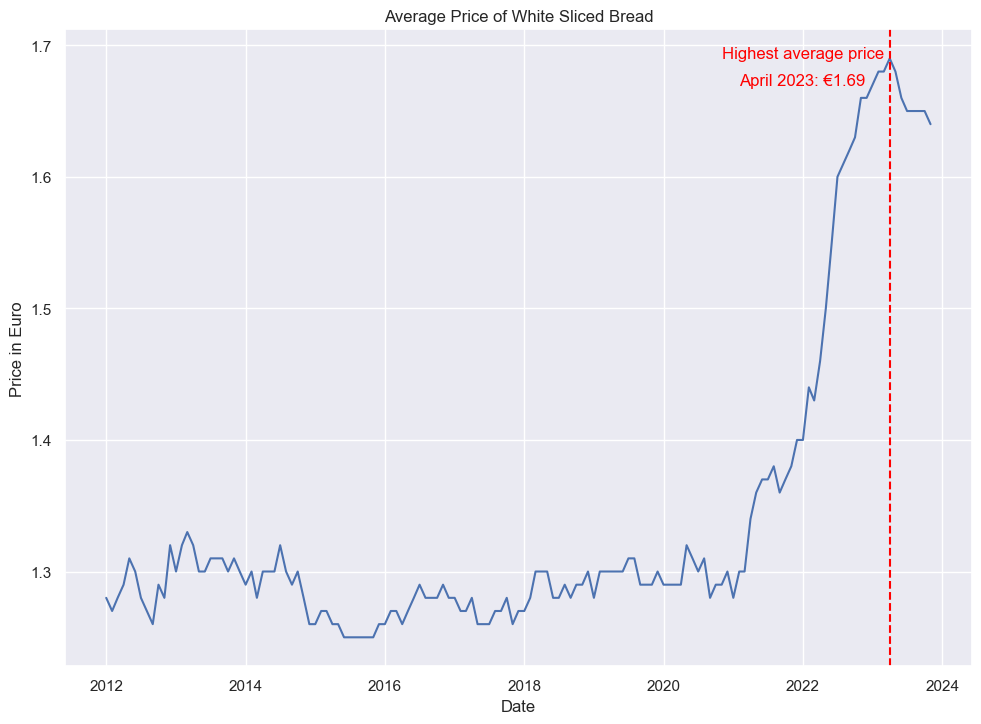

In [119]:
# Visualise the price of bread over time


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

"""How to change the figure size of a seaborn axes or figure level plot 
https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot"""

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(data=bread, x="Date", y="VALUE")
ax.set(title='Average Price of White Sliced Bread', ylabel='Price in Euro')

"""Dashed line in seaborn
https://stackoverflow.com/questions/63649340/how-to-draw-a-vertical-line-at-the-mode-of-the-seaborn-distplot
"""
plt.axvline(x='2023 April', color='red', linestyle='dashed')
ax.text('2020 November', 1.69, "Highest average price", color='red')
ax.text('2021 February', 1.67, "April 2023: €1.69 ", color='red')
plt.show()

In [120]:
import numpy as np

bread['Period'] = np.where(bread['Date'] >= '2021-09-01', 'Cost of Living Crisis', 'Pre-Crisis')
bread.tail()

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/2670341100.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Consumer Item,VALUE,Year,Date,Period
10566,2023 July,"Bread, white sliced pan, large (800g)",1.65,2023,2023-07-01,Cost of Living Crisis
10642,2023 August,"Bread, white sliced pan, large (800g)",1.65,2023,2023-08-01,Cost of Living Crisis
10718,2023 September,"Bread, white sliced pan, large (800g)",1.65,2023,2023-09-01,Cost of Living Crisis
10794,2023 October,"Bread, white sliced pan, large (800g)",1.65,2023,2023-10-01,Cost of Living Crisis
10870,2023 November,"Bread, white sliced pan, large (800g)",1.64,2023,2023-11-01,Cost of Living Crisis


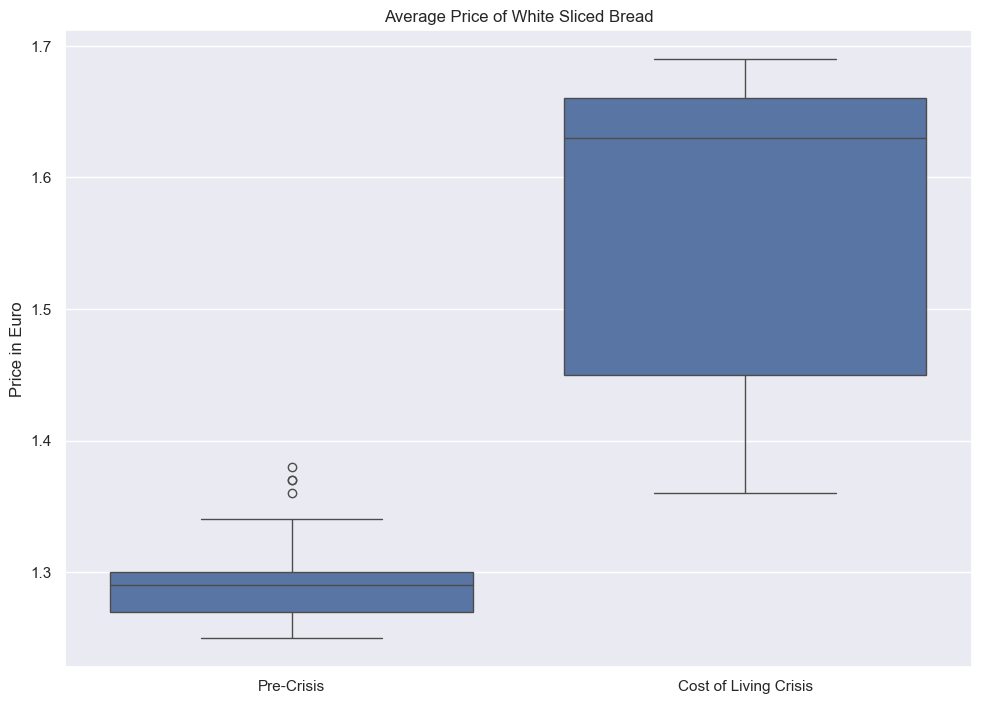

In [121]:
# Visualise the price of bread pre crisis and post crisis

ax = sns.boxplot(data=bread, x="Period", y="VALUE")
ax.set(title='Average Price of White Sliced Bread', ylabel='Price in Euro', xlabel='')
plt.show()

In [122]:
# Create new datetime column
bread['Quarter'] = bread['Date'].dt.to_period('Q')
bread.head()

/var/folders/b7/bybn4cfj0sn9yydcg03b7d980000gn/T/ipykernel_2754/3045816849.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Consumer Item,VALUE,Year,Date,Period,Quarter
78,2012 January,"Bread, white sliced pan, large (800g)",1.28,2012,2012-01-01,Pre-Crisis,2012Q1
154,2012 February,"Bread, white sliced pan, large (800g)",1.27,2012,2012-02-01,Pre-Crisis,2012Q1
230,2012 March,"Bread, white sliced pan, large (800g)",1.28,2012,2012-03-01,Pre-Crisis,2012Q1
306,2012 April,"Bread, white sliced pan, large (800g)",1.29,2012,2012-04-01,Pre-Crisis,2012Q2
382,2012 May,"Bread, white sliced pan, large (800g)",1.31,2012,2012-05-01,Pre-Crisis,2012Q2


In [123]:
# convert year column to int
crime['Year'] = crime['Year'].astype(int)
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157052 entries, 0 to 157051
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Quarter          157052 non-null  object
 1   Garda Division   157052 non-null  object
 2   Type of Offence  157052 non-null  object
 3   VALUE            157052 non-null  int64 
 4   Year             157052 non-null  int64 
 5   Q                157052 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.2+ MB


In [124]:
# subset crime data to match bread data ie. from 2011

crime2012 = crime[crime['Year'] > 2011]
crime2012.head()

,Quarter,Garda Division,Type of Offence,VALUE,Year,Q
71568,2012Q1,Cavan/Monaghan Garda Division,Homicide offences,1,2012,Q1
71569,2012Q1,Cavan/Monaghan Garda Division,Murder,0,2012,Q1
71570,2012Q1,Cavan/Monaghan Garda Division,Manslaughter,1,2012,Q1
71571,2012Q1,Cavan/Monaghan Garda Division,Infanticide,0,2012,Q1
71572,2012Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,0,2012,Q1


In [125]:
# subset Type of Offence to to only 'Theft from shop'

shop_theft = crime2012[crime2012['Type of Offence'].isin(['Theft from shop'])]
shop_theft.head()

,Quarter,Garda Division,Type of Offence,VALUE,Year,Q
71608,2012Q1,Cavan/Monaghan Garda Division,Theft from shop,64,2012,Q1
71679,2012Q1,Donegal Garda Division,Theft from shop,45,2012,Q1
71750,2012Q1,Sligo/Leitrim Garda Division,Theft from shop,59,2012,Q1
71821,2012Q1,Louth Garda Division,Theft from shop,120,2012,Q1
71892,2012Q1,Clare Garda Division,Theft from shop,79,2012,Q1


In [126]:
# create new dataframe (df1) with just Quarter and Number of Thefts

shop_theft_grouped = shop_theft.groupby('Quarter')['VALUE'].sum()
df1 = shop_theft_grouped.to_frame(name='Number of Thefts')
df1 = df1.reset_index()
df1.head()

,Quarter,Number of Thefts
0,2012Q1,4629
1,2012Q2,4942
2,2012Q3,4858
3,2012Q4,5123
4,2013Q1,4799


In [127]:
# create new dataframe (df2) with just Quarter and Price of Bread

bread_p_quarter = bread.groupby('Quarter')['VALUE'].mean()
df2 = bread_p_quarter.to_frame(name='Price of Bread')
df2 = df2.reset_index()
df2['Quarter'] = df2['Quarter'].astype(object)
df2.head()

,Quarter,Price of Bread
0,2012Q1,1.276667
1,2012Q2,1.300000
2,2012Q3,1.270000
3,2012Q4,1.296667
4,2013Q1,1.316667


In [128]:
# combine the data values from df1 and df2 
df1['Price of Bread'] = df2['Price of Bread']
df1.head()

,Quarter,Number of Thefts,Price of Bread
0,2012Q1,4629,1.276667
1,2012Q2,4942,1.300000
2,2012Q3,4858,1.270000
3,2012Q4,5123,1.296667
4,2013Q1,4799,1.316667


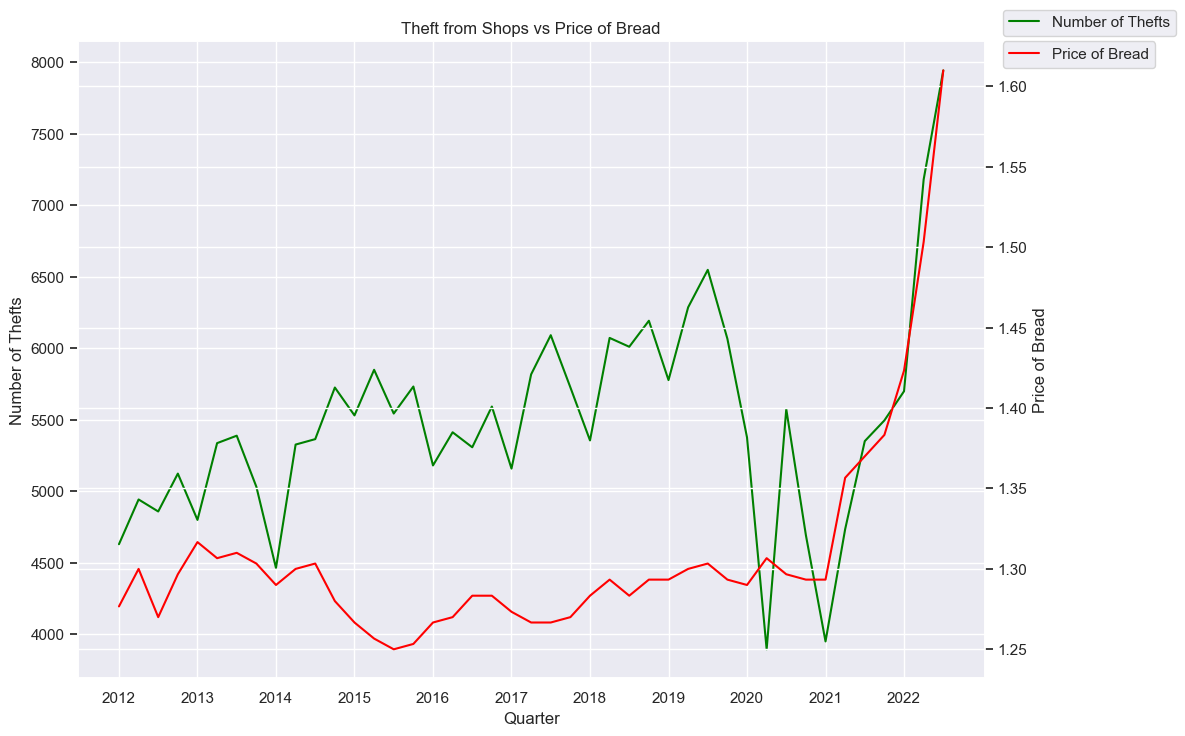

In [129]:
# Visualise the relationship between price of bread and thefts from shop over time

"""Skip Ticks
https://stackoverflow.com/questions/48352482/how-to-force-set-x-ticks-on-matplotlib-or-set-datetime-type-with-no-year
"""
ticks_to_use = df1.index[::4]

sns.lineplot(data=df1, x="Quarter", y='Number of Thefts', color='green', errorbar=None, label='Number of Thefts')
plt.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)
ax2 = plt.twinx()
sns.lineplot(data=df1, x="Quarter", y='Price of Bread', ax=ax2, color='red', errorbar=None, label='Price of Bread')
ax2.set_xticks(ticks_to_use, [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

"""Seaborn legend position
https://www.statology.org/seaborn-legend-position/"""
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Theft from Shops vs Price of Bread')
plt.show()

# Correlation

In [130]:
# Subset the data to include only cost of living crisis (2021+)

df1['Date'] = pd.to_datetime(df1.Quarter).dt.to_period('Q')
df2 = df1[df1['Date'] >= '2021Q1']
df2

,Quarter,Number of Thefts,Price of Bread,Date
36,2021Q1,3949,1.293333,2021Q1
37,2021Q2,4734,1.356667,2021Q2
38,2021Q3,5350,1.370000,2021Q3
39,2021Q4,5495,1.383333,2021Q4
40,2022Q1,5699,1.423333,2022Q1
41,2022Q2,7180,1.503333,2022Q2
42,2022Q3,7943,1.610000,2022Q3


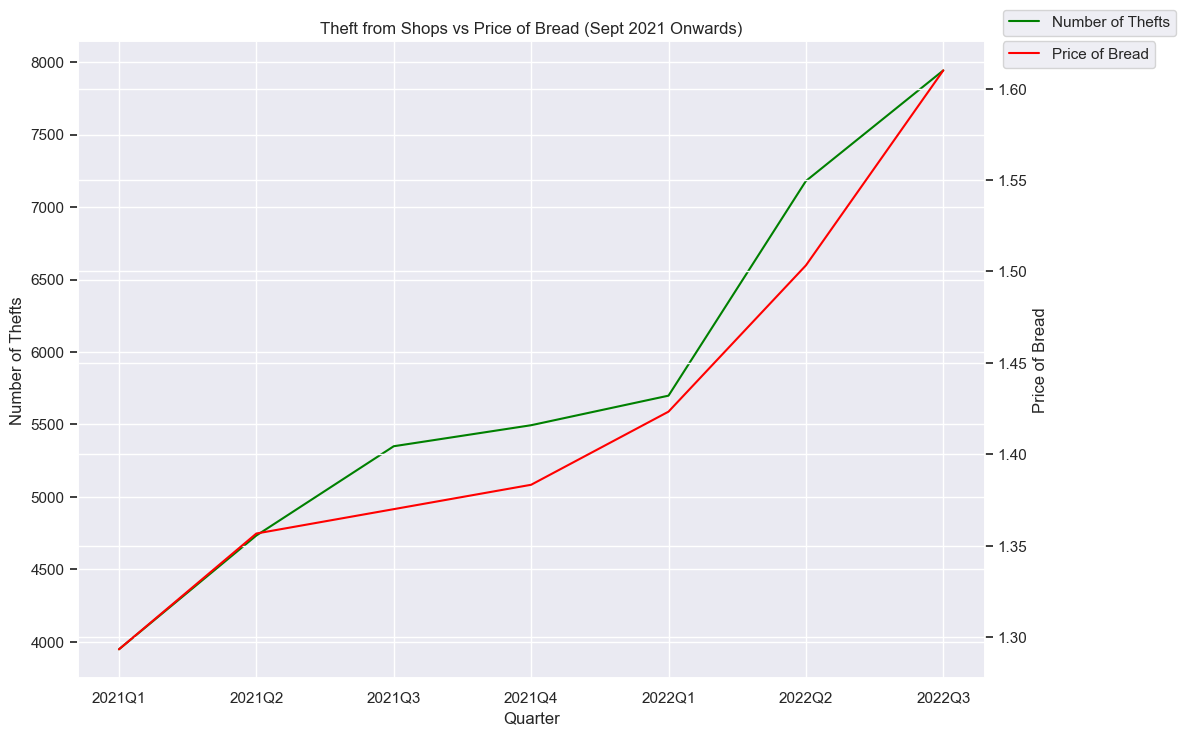

In [131]:
# Visualise this relationship since 2021

sns.lineplot(data=df2, x="Quarter", y='Number of Thefts', color='green', errorbar=None, label='Number of Thefts')
plt.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)
ax2 = plt.twinx()
sns.lineplot(data=df2, x="Quarter", y='Price of Bread', ax=ax2, color='red', errorbar=None, label='Price of Bread')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Theft from Shops vs Price of Bread (Sept 2021 Onwards)')
plt.show()

In [132]:
# Calculate Pearson's correlation coefficient

df_int= df2[['Number of Thefts', 'Price of Bread']]
df_int.corr()

,Number of Thefts,Price of Bread
Number of Thefts,1.000000,0.983375
Price of Bread,0.983375,1.000000


# Dataset 3: Population by Garda District

In [133]:
# import the data
garda = pd.read_csv('Garda_Districts_-_An_Garda_Siochana.csv')
garda.head()

,FID,District_N,District_C,Division,Area_Sq_km,Area_Sq_Mi,Revised_YN,Revised_Da,Pop_by_Dis,Housholds_,...,ITM_NORTH,LONGITUDE,LATITUDE,FULL_TIME_,AREA_CODE,PHONE_NUMB,STATION_TY,Shape_Leng,Shape__Area,Shape__Length
0,1,Store Street,1800G,DMR North Central,6.817,2.632,YES,2019/11/28 00:00:00+00,22775,7994,...,734784,-6.252246,53.350455,1,1,6668000,Division HQ,14465.294485,6.845086e+06,14465.294485
1,2,Pearse Street,1000F,DMR South Central,3.178,1.227,YES,2019/11/28 00:00:00+00,20034,6089,...,734248,-6.256269,53.345702,1,1,6669000,District HQ,8082.520076,3.191616e+06,8082.520076
2,3,Bridewell,1870H,DMR North Central,2.998,1.158,YES,2019/11/28 00:00:00+00,24012,9919,...,734373,-6.274130,53.347080,0,1,6668200,District HQ,8416.877906,3.038431e+06,8416.877906
3,4,Granard,2470H,Mayo & Roscommon/Longford,562.905,217.339,YES,2019/11/28 00:00:00+00,16246,6042,...,781115,-7.494222,53.778552,1,43,6687660,District HQ,163078.791740,5.651111e+08,163078.791740
4,5,Longford,2400G,Mayo & Roscommon/Longford,523.854,202.261,YES,2019/11/28 00:00:00+00,24609,9080,...,775892,-7.801380,53.732510,1,43,3350570,District HQ,146816.571014,5.258858e+08,146816.571014


In [134]:
# subset only relevant columns
garda_pop = garda[['District_N', 'Division', 'Pop_by_Dis', 'LONGITUDE', 'LATITUDE']]
garda_pop.head()

,District_N,Division,Pop_by_Dis,LONGITUDE,LATITUDE
0,Store Street,DMR North Central,22775,-6.252246,53.350455
1,Pearse Street,DMR South Central,20034,-6.256269,53.345702
2,Bridewell,DMR North Central,24012,-6.274130,53.347080
3,Granard,Mayo & Roscommon/Longford,16246,-7.494222,53.778552
4,Longford,Mayo & Roscommon/Longford,24609,-7.801380,53.732510


In [135]:
# visualise the poulation size by Garda division

"""Plot co-ordinates on plotly map
https://plotly.com/python/mapbox-layers/"""

fig = px.scatter_mapbox(garda_pop, 
                        lat='LATITUDE', lon='LONGITUDE', 
                        hover_name="District_N", 
                        hover_data={"Division":False, "District_N":True, 'Pop_by_Dis':True, 'LONGITUDE':False, 'LATITUDE':False}, 
                        labels={'Pop_by_Dis':'Population'},
                        color='Pop_by_Dis', size='Pop_by_Dis',
                        zoom=6.1, height=700, opacity=1)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [136]:
population_by_division = garda[['Division', 'Pop_by_Dis']]
summed_pop = population_by_division.groupby('Division')['Pop_by_Dis'].sum()
summed_pop = summed_pop.to_frame()
summed_pop = summed_pop.reset_index()
summed_pop['Division'].head()

0                     3900D
1                     3931D
2                     4022C
3                     4074F
4    Cavan/Monaghan & Louth
Name: Division, dtype: object

In [137]:
# calculate population KPIs


# 1. Ireland population
pop_ireland = garda_pop['Pop_by_Dis'].sum()
print('Total Ireland population: ' + str(pop_ireland))

Total Ireland population: 4753647


In [138]:
# 2. Dublin population
pop_dublin = summed_pop[summed_pop['Division'].isin(['DMR West', 'DMR South Central', 'DMR South', 'DMR North Central', 'DMR North', 'DMR East'])]
total_pop_dublin = pop_dublin['Pop_by_Dis'].sum()
print('Total Dublin population: ' + str(total_pop_dublin))

Total Dublin population: 1346907


In [139]:
# 3. Outside Dublin population
pop_outside_dublin = summed_pop[~summed_pop['Division'].isin(['DMR West', 'DMR South Central', 'DMR South', 'DMR North Central', 'DMR North', 'DMR East'])]
total_pop_outside_dublin = pop_outside_dublin['Pop_by_Dis'].sum()
total_pop_outside_dublin

print('Total population outside Dublin: ' + str(total_pop_outside_dublin))

Total population outside Dublin: 3406740


In [140]:
# create new df with Dublin vs Outside Dublin population + percentage

df = pd.DataFrame(dict(
    location = ["Dublin", "Outside Dublin"],
    population = [total_pop_dublin, total_pop_outside_dublin], dtype='int'))

total = df['population'].sum()
df['percentage']= round((df['population'] / total) * 100,2)

In [141]:
# Visualise Dublin vs Outside Dublin population + percentage
fig = px.bar(df, x = 'location', y = 'population', color='location', 
             title='% Population of Dublin vs Outside Dublin', text='percentage')

fig.show()

In [142]:
# calculate crime KPIs

# 1. Dublin crime count
locations = locations.reset_index()
crime_dublin = locations[locations['Garda Division'].isin(['D.M.R. Western Garda Division', 'D.M.R. South Central Garda Division', 'D.M.R. Southern Garda Division', 'D.M.R. North Central Garda Division', 'D.M.R. Northern Garda Division', 'D.M.R. Eastern Garda Division'])]
total_crime_dublin = crime_dublin['VALUE'].sum()
total_crime_dublin

print('Total crimes in Dublin: ' + str(total_crime_dublin))

Total crimes in Dublin: 3836948


In [143]:
# 2. Outside Dublin crime count
crime_outside_dublin = locations[~locations['Garda Division'].isin(['D.M.R. Western', 'D.M.R. South Central', 'D.M.R. Southern', 'D.M.R. North Central', 'D.M.R. Northern', 'D.M.R. Eastern'])]
total_crime_outside_dublin = crime_outside_dublin['VALUE'].sum()
total_crime_outside_dublin

print('Total crimes outside Dublin: ' + str(total_crime_outside_dublin))

Total crimes outside Dublin: 9278110


In [144]:
# 3. Dublin crime rate
dublin_crime_rate = round(total_crime_dublin / total_pop_dublin, 3)

# 4. Outside Dublin crime rate
outside_dublin_crime_rate = round(total_crime_outside_dublin / total_pop_outside_dublin, 3)

print('Dublin crime rate (per person): ' + str(dublin_crime_rate))
print('Outside Dublin crime rate (per person): ' + str(outside_dublin_crime_rate))


Dublin crime rate (per person): 2.849
Outside Dublin crime rate (per person): 2.723


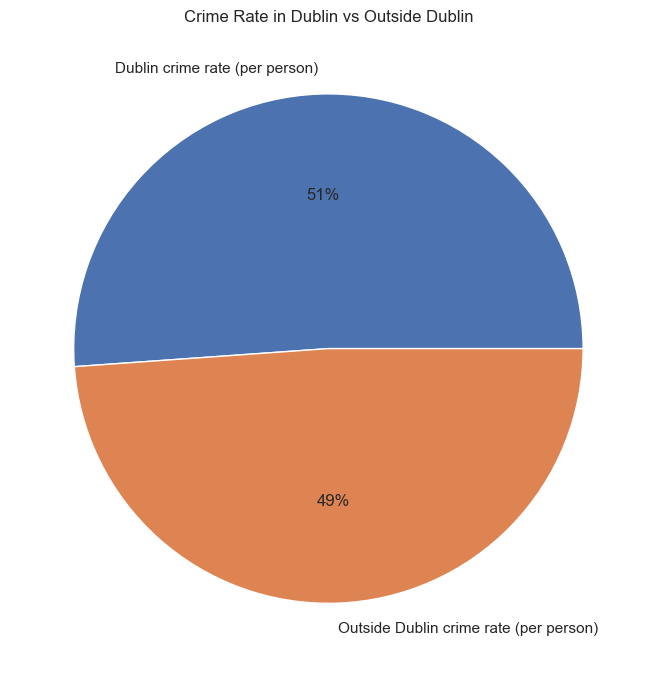

In [145]:
# Visualise Dublin vs Outside Dublin crime rate

labels = ['Dublin crime rate (per person)', 'Outside Dublin crime rate (per person)']
data = [dublin_crime_rate, outside_dublin_crime_rate]

"""Label the pie
https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct"""

plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title("Crime Rate in Dublin vs Outside Dublin")
plt.show()